# LAB: (quasi-) Newton methods

Author : Alexandre Gramfort

The objective of this lab session is to implement:
- Newton method
- DFP
- BFGS
and compare your implementation with the BFGS and L-BFGS solvers in scipy

You will need knowledge on **line search methods** and **conjugate gradient** in particular you should reuse the notebooks presented during the lectures.

## VERY IMPORTANT

- This work **must be done by pairs of students**.
- **Each** student must send their work **before the 29th of october at 23:59**, using the **moodle platform**.
- This means that **each student in the pair sends the same file**
- On the moodle, in the "Optimization for Data Science" course, you have a "devoir" section called **Rendu TP du 23 octobre 2016**. This is where you submit your jupyter notebook file. 
- The **name of the file must be** constructed as in the next cell

# Gentle reminder: no evaluation if you don't respect this EXACTLY

### How to construct the name of your file

In [3]:
# Change here using YOUR first and last names
fn1 = "Benoit"
ln1 = "Robaglia"
fn2 = ""
ln2 = ""

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["tp4_newton", ln1, fn1])) + ".ipynb"
print(filename)

tp3_newton_robaglia_benoit.ipynb


# Part 0: Demo using Gradient descent

First import the necessary libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import time 

%matplotlib inline

Now import the necessary function from the optim_utils.py file.

In [3]:
from optim_utils import test_solver

You'll have work only with the `test_solver` function.

This function expects a function as parameter.

The signature of the function `optimizer` to pass should be the following:

`optimizer(x0, f, f_grad, f_hessian)`

Let us now make an example with a gradient descent.

In [4]:
def gradient_descent(x0, f, f_grad, f_hessian=None):

    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = False

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              -grad_x, grad_x,
                                                              c1=c1, c2=c2)
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        x -= step*grad_x

        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)

Now I can call the `test_solver` function with this solver:


Running solver on case 1

Running solver on case 2

Running solver on case 3


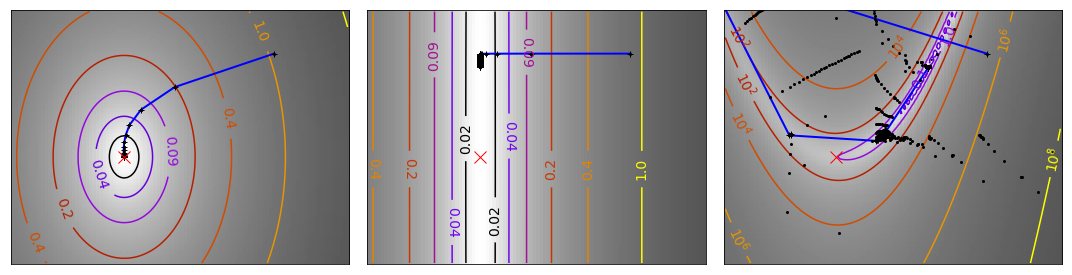

The running time is: 1.48726487159729


In [5]:
start = time.time()
test_solver(gradient_descent)
print("The running time is:", time.time() - start)

# Part 2: Implement Newton method

You now need to implement Newton method using either `linalg.solve` or `sparse.linalg.cg` solve the linear system at each iteration. You will implement both versions by adding a new parameter `solver` equal to either `gauss_pivot` or `conjugate_gradient`.

You're expected to comment in a few lines what you see.

In [8]:
from scipy import linalg
from scipy.linalg import solve
from scipy.sparse.linalg import cg

def newton(x0, f, f_grad, f_hessian, solver="gauss"):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)
        
        ####################################
        # Compute here the search direction
        if solver == "gauss" :
            d = -solve(f_hessian(x), grad_x)
        else:
            d = -cg(f_hessian(x), grad_x)[0]
        ####################################

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################
        # Compute here the new value of x
        x += step*d 
        ##################################

        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0, l_inf_norm(grad): 0

Running solver on case 2
iter: 1, f: 0, l_inf_norm(grad): 0

Running solver on case 3
iter: 1, f: 0.357547, l_inf_norm(grad): 1.19858
iter: 2, f: 0.253454, l_inf_norm(grad): 14.6168
iter: 3, f: 0.137976, l_inf_norm(grad): 3.9843
iter: 4, f: 0.088137, l_inf_norm(grad): 6.14586
iter: 5, f: 0.0414804, l_inf_norm(grad): 3.93321
iter: 6, f: 0.0162138, l_inf_norm(grad): 2.7976
iter: 7, f: 0.00446914, l_inf_norm(grad): 1.29953
iter: 8, f: 0.000705202, l_inf_norm(grad): 0.668389
iter: 9, f: 3.34966e-05, l_inf_norm(grad): 0.121298
iter: 10, f: 1.24866e-07, l_inf_norm(grad): 0.00982241
iter: 11, f: 2.01025e-12, l_inf_norm(grad): 3.05844e-05
iter: 12, f: 5.2958e-22, l_inf_norm(grad): 6.41073e-10


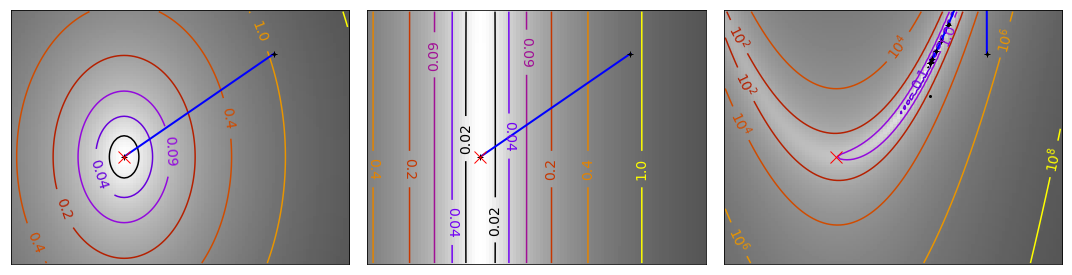

The running time is:  1.3351097106933594


In [9]:
start = time.time()
test_solver(newton)
print("The running time is: ", time.time() - start)

The line search (strong Wolfe conditions) insures global convergence of the Newton algorithm (i.e. convergence whatever the initial point).

Besides, we use the  Newton algorithm with the "linalg.solve" or "sparse.linalg.cg" functions for solving the following equation : $Ax=b$ with $A$ the Hessian and $b$ the Gradient. 
The first approach uses the gauss pivot method for computing the inverse of the Hessian. However, this can be an expensive operation in high dimensions and it may be better to use an iterative method such as the conjugate gradient for solving such a problem (i.e. "sparse.linalg.cg"). This approach produces the exact solution after a finite number of iterations.


We illustate the methods with three functions:
- a quadratic function, 
- a gaussian function,
- a Rosenbrock function (the global minimum is inside a long, narrow, parabolic shaped flat valley).


#### Comparaison of the Newton method using gauss_pivot or conjugate_gradient:

- Quadratic case:

For both approaches, we observe that the Newton algorithm converges in one iteration. It corroborates what we have seen in class: for quadratic functions Newton method converges in one iteration independently of the choice of x0. 

- Gaussian case: 

Since the gaussian case is the exponential of a quadratic function, we observe the same: the algorithm converges in one iteration. However, with the conjugate gradient the minimum is just approximated (it may be because of the round-off error related to the conjugate gradient method) since the value of f is 3.40668e-26 (against 0 with the gauss pivot method).

- Rosenbrock case: 

In both cases, the convergence is reached with 12 iterations (this function is more difficult to minimize due to the "valley"). 


#### Comparison of the Newton and the gradient descent methods:

We observe that the Newton algorithm requires fewer iterations to converge than the gradient descent. For example, for the quadratic case, the gradient descent algorithm needs 33 iterations. In addition, for the gaussian and rosenbrock functions, the minimizer is not reached after 100 iterations. More precisely, in the case of the gaussian function, the gradient does not point in the direction of the minimum. In the case of the Rosenbrock function, the gradient descent is zig-zagging, while the Newton algorithm does not "miss" the valey since it takes into account the Hessian (i.e. the curvature of the function). 

The newton algorithm requires fewer iterations because it has a quadratic convergence (against a linear one for the gradient descent).


# Part 2: Implement DFP algorithm

You now need to implement the DFP algorithm.

In [10]:
def dfp(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.95
    max_iter = 200
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    B = np.eye(len(x))  # inverse Hessian approximation
    
    grad_x = f_grad(x)
    
    for k in range(1, max_iter + 1):       
        
        ####################################
        # Compute here the search direction
        d = -np.dot(B, grad_x)
        ####################################

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################
        # Compute here the new value of x
        x += step*d 
        ##################################
        
        #########################################################
        # Update the inverse Hessian approximation
        s = step*d 
        y = new_grad - grad_x
        ST = np.outer(s, s)
        YT = np.outer(y, y)
        B = B + ST/np.dot(s.T, y) - np.dot(np.dot(B, YT), B)/np.dot(y.T, np.dot(B, y))
        #########################################################
            
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0214911, l_inf_norm(grad): 0.114753
iter: 3, f: 0.00899657, l_inf_norm(grad): 0.069501
iter: 4, f: 0.00023476, l_inf_norm(grad): 0.0175216
iter: 5, f: 1.76801e-05, l_inf_norm(grad): 0.00465113
iter: 6, f: 3.20353e-08, l_inf_norm(grad): 0.000140183
iter: 7, f: 1.32183e-10, l_inf_norm(grad): 8.99094e-06
iter: 8, f: 8.82459e-15, l_inf_norm(grad): 1.04309e-07

Running solver on case 2
iter: 1, f: 0.0978185, l_inf_norm(grad): 0.35904
iter: 2, f: 0.000159508, l_inf_norm(grad): 0.000290207
iter: 3, f: 0.000138677, l_inf_norm(grad): 0.000270594
iter: 4, f: 1.92681e-07, l_inf_norm(grad): 0.000503909
iter: 5, f: 1.4273e-07, l_inf_norm(grad): 0.000433799
iter: 6, f: 3.512e-14, l_inf_norm(grad): 1.6706e-08

Running solver on case 3
iter: 1, f: 104.123, l_inf_norm(grad): 700.972
iter: 2, f: 7.56575, l_inf_norm(grad): 24.138
iter: 3, f: 7.34339, l_inf_norm(grad): 4.87789
iter: 4, f: 7.29892, l_inf_norm(grad): 8.4

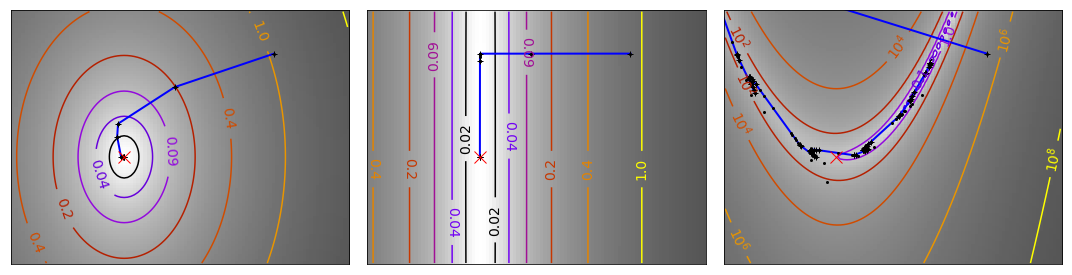

The running time is:  1.4127790927886963


In [11]:
start = time.time()
test_solver(dfp)
print("The running time is: ", time.time() - start)


The Davidon-Fletcher-Powell algorithm modifies the inverse hessian with a correction formulation of rank 2 such that the approximation of the inverse hessian is positive definite.

The algorithm converges now in 8, 6 and 90 iterations for, respectively, the quadractic, gaussian and rosenbrock functions. The number of iterations has increased (compared to the previous Newton method) since the conditioning of $B.A$ is larger (with $B$ the approximation of the inverse hessian and $A$ the hessian). The approximation of $A$ may be less acurate because of the "correction" and consequently the search directions may be less good.
 
Note that according to the theorem of DFP, when $f$ is quadratic, the algorithm should converge in at most $n$ iterations ($n=2$ in our case) - it is not observed here since we do not have an optimal step size (line search gives just a "good enough" step size).

# Part 3: Implement BFGS algorithm

You now need to implement the BFGS algorithm.

In [12]:
def bfgs(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    grad_x = f_grad(x)
    H = np.eye(len(x))  # Hessian approximation
    
    for k in range(1, max_iter + 1):       

        ####################################
        # Compute here the search direction
        d = -solve(H, grad_x)
        ####################################

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
                
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################    
        # Compute here the new value of x
        s = step*d 
        x += s
        ##################################
        
        #####################################################
        # Update the Hessian approximation 
        y = new_grad - grad_x
        YT = np.outer(y, y)
        ST = np.outer(s, s)
        H = H + YT/np.dot(y, s) - np.dot(H, np.dot(ST, H))/np.dot(s, np.dot(H, s))
        #####################################################
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0209281, l_inf_norm(grad): 0.11324
iter: 3, f: 0.00806831, l_inf_norm(grad): 0.0656686
iter: 4, f: 3.9809e-05, l_inf_norm(grad): 0.00723054
iter: 5, f: 4.69973e-07, l_inf_norm(grad): 0.000735419
iter: 6, f: 7.22702e-11, l_inf_norm(grad): 6.78586e-06
iter: 7, f: 2.47614e-14, l_inf_norm(grad): 1.18656e-07

Running solver on case 2
iter: 1, f: 0.0978185, l_inf_norm(grad): 0.35904
iter: 2, f: 0.000159508, l_inf_norm(grad): 0.000290207
iter: 3, f: 0.000119306, l_inf_norm(grad): 0.00025098
iter: 4, f: 6.91982e-13, l_inf_norm(grad): 9.54949e-07

Running solver on case 3
iter: 1, f: 104.123, l_inf_norm(grad): 700.972
iter: 2, f: 7.59071, l_inf_norm(grad): 26.034
iter: 3, f: 7.34411, l_inf_norm(grad): 4.87129
iter: 4, f: 7.29555, l_inf_norm(grad): 8.30631
iter: 5, f: 6.98403, l_inf_norm(grad): 49.3631
iter: 6, f: 6.72314, l_inf_norm(grad): 26.9831
iter: 7, f: 6.31556, l_inf_norm(grad): 14.5499
iter: 8, f: 5.

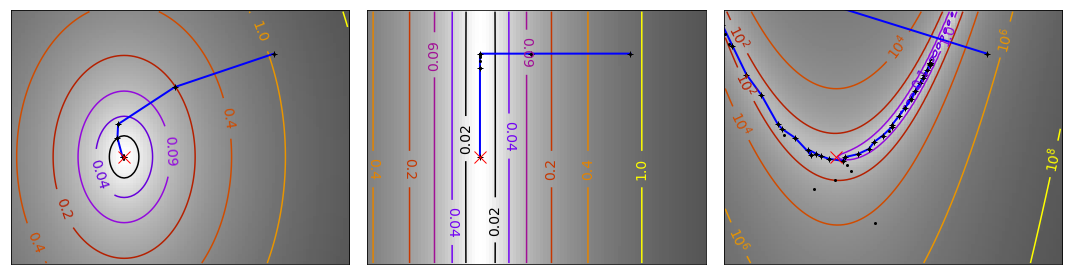

The running time is:  1.4827136993408203


In [13]:
start=time.time()
test_solver(bfgs)
print("The running time is: ", time.time() - start)

Compared to the DFP algorithm the number of iterations required for convergence has decreased: the quadratic, gaussian and rosenbrock functions converge now, respectively, in 7, 4 and 42 iterations. It is due to the fact that the BFGS algorithm is less sensitive than DFP to the use of approximate step size.

Note that the DFP and BGFS algorithms have quite similar performance concerning quadratic functions.


# Part 4: Do the same now with scipy implementation of BFGS and L-BFGS

## BFGS


Running solver on case 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8

Running solver on case 2
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 10
         Gradient evaluations: 10

Running solver on case 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 35
         Gradient evaluations: 35


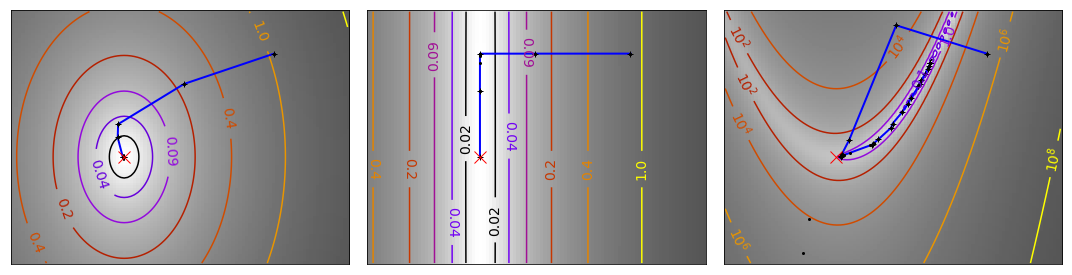

The running time is:  1.2858428955078125


In [14]:
from scipy.optimize import fmin_bfgs

def python_implement(x0, f, f_grad, f_hessian):
    x,all_x_k = fmin_bfgs(f, x0, fprime=f_grad, retall=True, gtol=1e-06)
    all_f_k=[f(x) for x in all_x_k]
    return np.array(all_x_k), np.array(all_f_k)

start=time.time()
test_solver(python_implement)

print("The running time is: ", time.time() - start)

The BFGS algorithm from Scipy requires the same number of iterations as our own implementation for the quadratic and gaussian cases. However, the Scipy algorithm converges in 26 iterations for the rosenbrock function: it is much more performant.

## L-BFGS


Running solver on case 1
number of iterations:  5

Running solver on case 2
number of iterations:  4

Running solver on case 3
number of iterations:  19


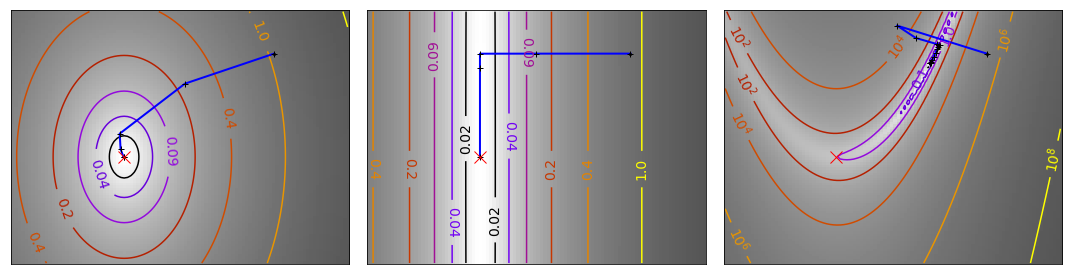

The running time is:  1.584883451461792


In [19]:
from scipy.optimize import fmin_l_bfgs_b

def python_implement(x0, f, f_grad, f_hessian):
    all_x_k = [x0.copy()]
    all_f_k = [f(x0)]
    
    def callback(x):
        all_x_k.append(x.copy())
        all_f_k.append(f(x))
    
    x = fmin_l_bfgs_b(f, x0, fprime=f_grad, callback=callback)
    
    print("number of iterations: ", len(all_x_k)-1)
    return np.array(all_x_k), np.array(all_f_k)

start=time.time()
test_solver(python_implement)
print("The running time is: ", time.time() - start)

The L-BFGS and BFGS algorithms converge with aproximately the same number of iterations for the first two functions. However, regarding the third function, which is not quadratic, the L-BFGS converges in fewer iterations than the BFGS (19 iterations against 26 iterations for the BFGS). This is clearly shown by the graphs. 

To conclude, L-BFGS performs better even when memory is not an issue.

##### Note: 
    
We tried to time our implementations (i.e. to measure how long it takes to run the codes) in order to compare the different algorithms. However, it does not seem to be leading to any positive outcome since our results were somehow random and unsteady. The performance of the algorithms could not be assessed in terms of running time since we are not facing memory problems.